In [ ]:
# Библиотека Matplotlib 
# объектно-ориентированный режим
# Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) 
# и координатных плоскостей (axes, или системы координат)

In [ ]:
# Процесс работы 
# сначала создаётся объект фигуры (fig)
# размер в дюймах (figsize
# метод add_axes() добавляется координатная плоскость
# а на ней располагаются графические объекты
# Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат
# она начинается в левом нижнем углу без отступов (координаты 0, 0)
# и занимает всё отведённое место в области (100%, ширина и высота равны 1).

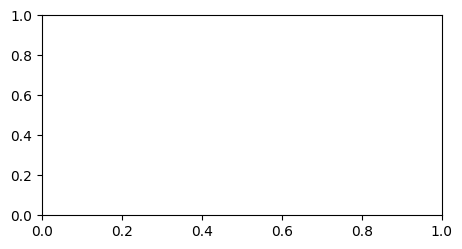

In [4]:
import matplotlib.pyplot as plt
# % matplotlib inline
# plt.style.use('default')

fig = plt.figure(figsize =(4,2))
axes = fig.add_axes([0,0,1,1])

In [6]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
display(covid_df.head(3))

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
